In [32]:
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Get a list of all CSV files in a directory
csv_files = glob('extracted_features/*.csv')

# Create an empty dataframe to store the combined data
data = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    data = pd.concat([data, df])

# Print the combined dataframe


In [6]:
data.head()

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
0,0.076065,0.975780,769.426581,0.828328,673.248259,0.0,7.0,63.0,1
1,0.072647,0.668800,510.113776,0.741447,510.113776,0.0,6.0,45.0,1
2,0.069570,0.646591,406.050055,0.716161,406.050055,0.0,7.0,45.0,1
3,0.070753,0.553134,638.027143,0.623887,638.027143,0.0,3.0,48.0,1
4,0.073334,0.722955,555.470869,0.796289,555.470869,0.0,4.0,51.0,1


In [7]:
len(data)

1760

In [8]:
data.describe()

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,0.115514,0.952100,471.587845,1.018669,464.228611,0.215909,6.855114,46.450000,0.500000
std,0.026339,0.701359,212.388368,0.665014,208.378581,0.411568,4.906752,11.985295,0.500142
min,0.061586,0.188908,179.164520,0.136418,150.595037,0.000000,1.000000,10.000000,0.000000
25%,0.095207,0.555139,322.691455,0.629845,314.966384,0.000000,4.000000,41.000000,0.000000
50%,0.117266,0.749423,411.584994,0.829494,407.741408,0.000000,7.000000,44.000000,0.500000
75%,0.130498,1.115375,559.801943,1.198982,554.780113,0.000000,8.000000,48.000000,1.000000
max,0.214586,9.905352,1860.326693,10.057879,1860.326693,1.000000,71.000000,200.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dwell_avg     1760 non-null   float64
 1   flight_avg    1760 non-null   float64
 2   traj_avg      1760 non-null   float64
 3   keyboard_avg  1760 non-null   float64
 4   mouse_avg     1760 non-null   float64
 5   day_type      1760 non-null   float64
 6   freq_mouse    1760 non-null   float64
 7   freq_key      1760 non-null   float64
 8   label         1760 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 137.5 KB


In [19]:
# calculate the corr
correlation = data.corr()

correlation

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
dwell_avg,1.000000,0.212807,-0.207004,0.244630,-0.201533,-5.562126e-02,0.071887,-0.057050,2.633782e-02
flight_avg,0.212807,1.000000,-0.101507,0.958814,-0.116933,4.464992e-02,0.533938,0.236629,-8.527255e-03
traj_avg,-0.207004,-0.101507,1.000000,-0.105851,0.990362,7.795145e-03,-0.311188,-0.007171,-2.393195e-02
keyboard_avg,0.244630,0.958814,-0.105851,1.000000,-0.120678,3.567587e-02,0.467583,0.141321,-7.494742e-03
mouse_avg,-0.201533,-0.116933,0.990362,-0.120678,1.000000,-3.117235e-03,-0.327127,-0.013719,-3.946030e-02
day_type,-0.055621,0.044650,0.007795,0.035676,-0.003117,1.000000e+00,0.048436,-0.035382,-1.442675e-16
freq_mouse,0.071887,0.533938,-0.311188,0.467583,-0.327127,4.843618e-02,1.000000,0.586726,2.698812e-02
freq_key,-0.057050,0.236629,-0.007171,0.141321,-0.013719,-3.538195e-02,0.586726,1.000000,1.147565e-02
label,0.026338,-0.008527,-0.023932,-0.007495,-0.039460,-1.442675e-16,0.026988,0.011476,1.000000e+00


<Axes: >

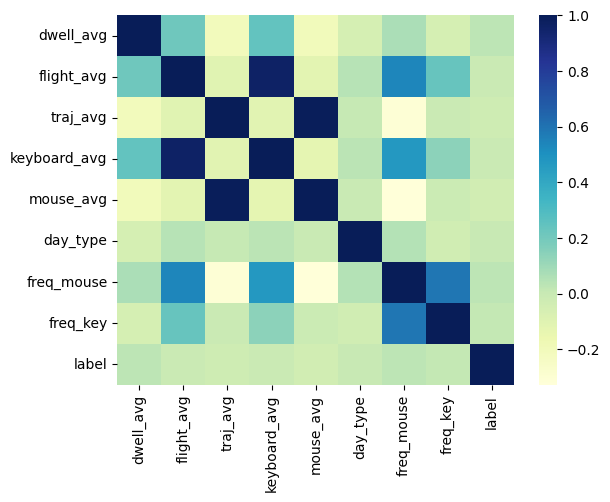

In [20]:
# visualize the correlations

sns.heatmap(correlation, cmap="YlGnBu")

In [22]:
X = data.drop(columns='label')
y = data['label']

In [23]:
minmax_scaler = MinMaxScaler()
X[['dwell_avg', 'flight_avg', 'traj_avg',
   'keyboard_avg', 'mouse_avg', 'day_type',
   'freq_mouse', 'freq_key']] = minmax_scaler.fit_transform(X[['dwell_avg', 'flight_avg', 'traj_avg',
                                                               'keyboard_avg', 'mouse_avg', 'day_type',
                                                               'freq_mouse', 'freq_key']])

In [24]:
X.head()

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key
0,0.094637,0.080983,0.351104,0.069739,0.305693,0.0,0.085714,0.278947
1,0.072295,0.049390,0.196857,0.060982,0.210278,0.0,0.071429,0.184211
2,0.052183,0.047104,0.134958,0.058433,0.149412,0.0,0.085714,0.184211
3,0.059917,0.037486,0.272944,0.049133,0.285093,0.0,0.028571,0.200000
4,0.076789,0.054963,0.223837,0.066510,0.236807,0.0,0.042857,0.215789


In [30]:
# calculate the corr after scaling
data_scaled = pd.concat([X, y], axis=1)
correlation_sc= data_scaled.corr()

correlation_sc

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
dwell_avg,1.000000,0.212807,-0.207004,0.244630,-0.201533,-5.562126e-02,0.071887,-0.057050,2.633782e-02
flight_avg,0.212807,1.000000,-0.101507,0.958814,-0.116933,4.464992e-02,0.533938,0.236629,-8.527255e-03
traj_avg,-0.207004,-0.101507,1.000000,-0.105851,0.990362,7.795145e-03,-0.311188,-0.007171,-2.393195e-02
keyboard_avg,0.244630,0.958814,-0.105851,1.000000,-0.120678,3.567587e-02,0.467583,0.141321,-7.494742e-03
mouse_avg,-0.201533,-0.116933,0.990362,-0.120678,1.000000,-3.117235e-03,-0.327127,-0.013719,-3.946030e-02
day_type,-0.055621,0.044650,0.007795,0.035676,-0.003117,1.000000e+00,0.048436,-0.035382,-1.442675e-16
freq_mouse,0.071887,0.533938,-0.311188,0.467583,-0.327127,4.843618e-02,1.000000,0.586726,2.698812e-02
freq_key,-0.057050,0.236629,-0.007171,0.141321,-0.013719,-3.538195e-02,0.586726,1.000000,1.147565e-02
label,0.026338,-0.008527,-0.023932,-0.007495,-0.039460,-1.442675e-16,0.026988,0.011476,1.000000e+00


<Axes: >

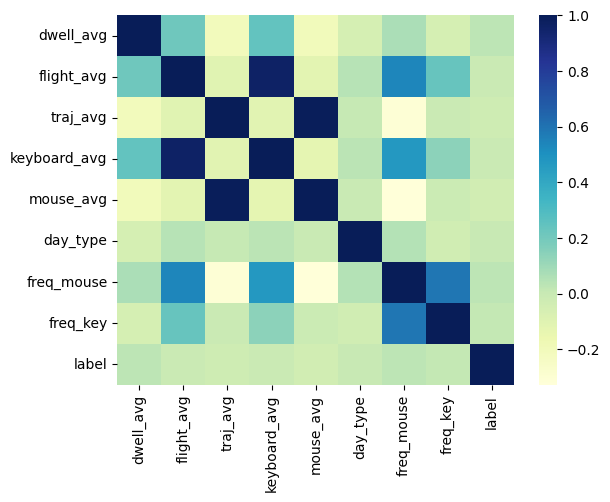

In [31]:
sns.heatmap(correlation_sc, cmap="YlGnBu")

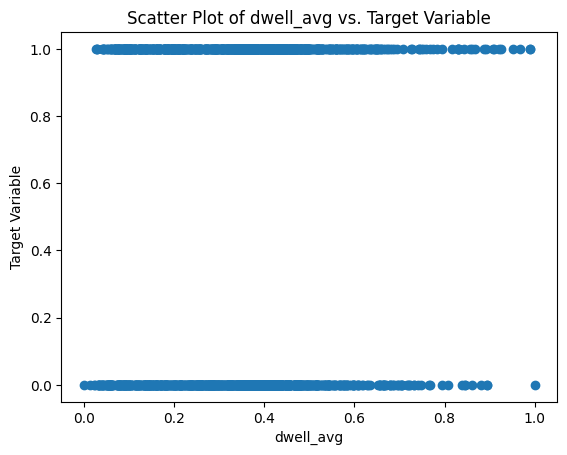

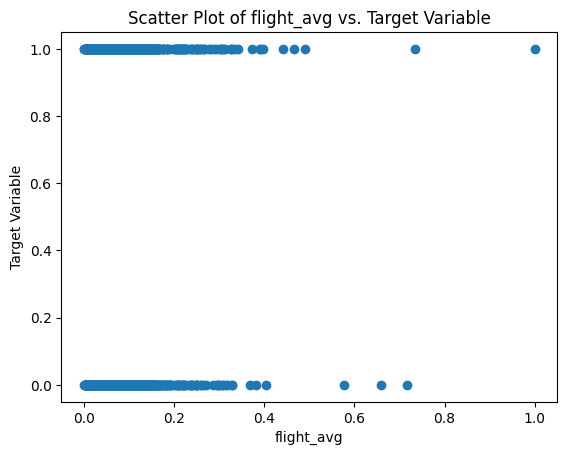

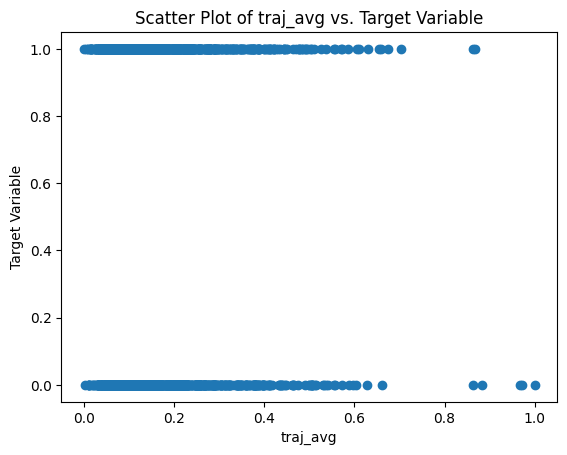

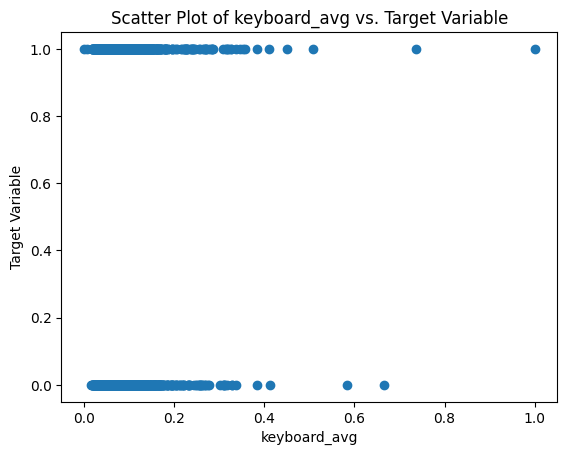

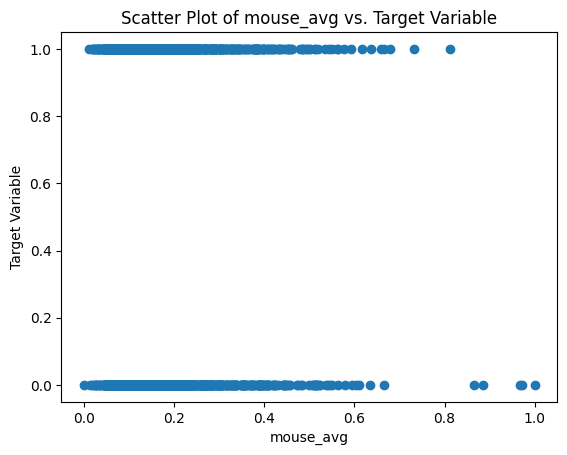

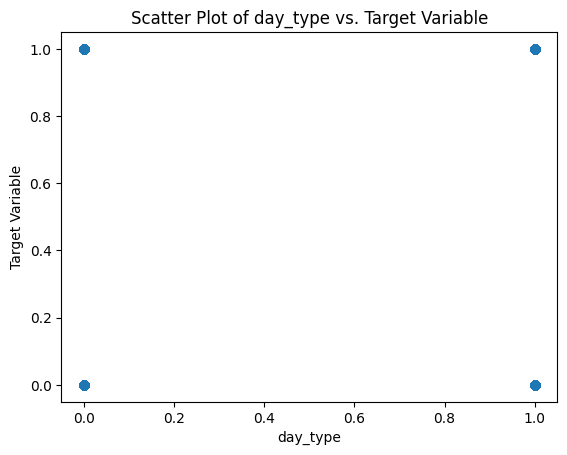

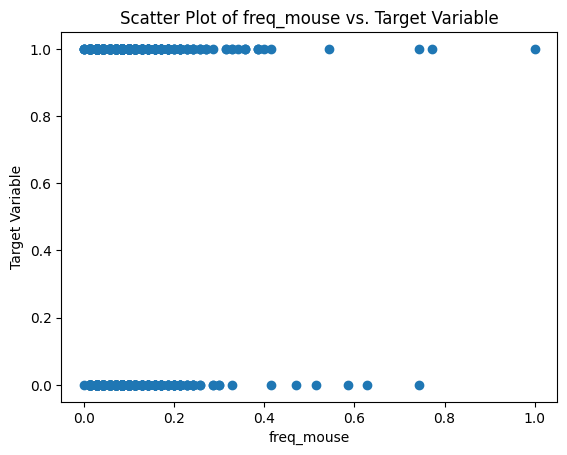

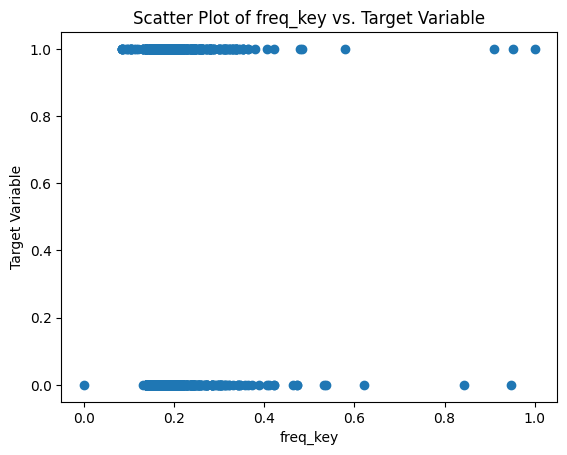

In [38]:
# Get the column names of X
feature_names = X.columns

# Create scatter plots for each feature in X
for feature in feature_names:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter Plot of {feature} vs. Target Variable')
    plt.show()

In [ ]:
plt.scatter(X[['day_type']], y)
plt.show()